# Выбор лучшей локации для новой нефтяной скважины

Допустим, я работаю в нефтедобывающей компании «РосНефть». Нужно решить, где нужно бурить новую скважину.

Мне предоставлены пробы нефти в *трёх регионах*: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

## Задача проекта:
Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализирую возможную прибыль и риски техникой *Bootstrap.*

## 1 шаг: Загрузка и подготовка данных

In [1071]:
# загружу необходимые библиотеки 
# отключу предупреждения

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

Загрузим каждый регион в отдельный датафрейм:

In [1072]:
try:
    geo_data_0 = pd.read_csv('geo_data_0.csv',sep=',')
    geo_data_1 = pd.read_csv('geo_data_1.csv',sep=',')
    geo_data_2 = pd.read_csv('geo_data_2.csv',sep=',')
    
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv',sep=',')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv',sep=',')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv',sep=',')


In [1073]:
def info_df(df):
    """Функция первичного знакомства с данными"""
    print(df.head(5))
    print('Общая информация:')
    print(df.info())

In [1074]:
info_df(geo_data_0)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [1075]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [1076]:
info_df(geo_data_1)

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [1077]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [1078]:
info_df(geo_data_2)

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [1079]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [1080]:
def sum_omissions_and_duplicates(df):
    """Функция поиска пропусков и дубликатов в данных"""
    print('Сумма пропусков:')
    print(df.isna().sum())
    print('Сумма дубликатов:')    
    print(df.duplicated().sum())

In [1081]:
# выведем пропуски и дубликаты geo_data_0:

sum_omissions_and_duplicates(geo_data_0)

Сумма пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Сумма дубликатов:
0


In [1082]:
# выведем пропуски и дубликаты  geo_data_1:

sum_omissions_and_duplicates(geo_data_1)

Сумма пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Сумма дубликатов:
0


In [1083]:
# выведем пропуски и дубликаты geo_data_2:

sum_omissions_and_duplicates(geo_data_2)

Сумма пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Сумма дубликатов:
0


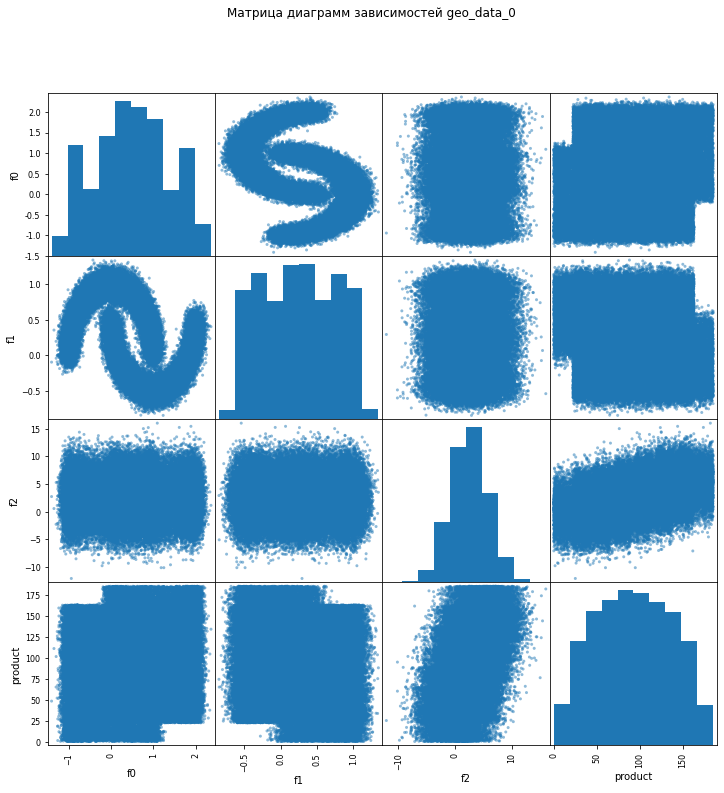

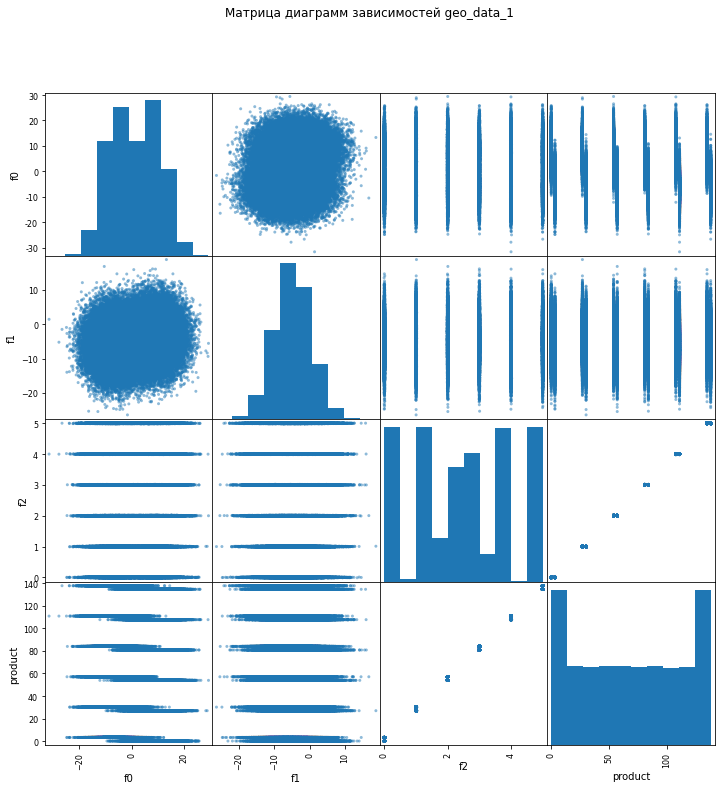

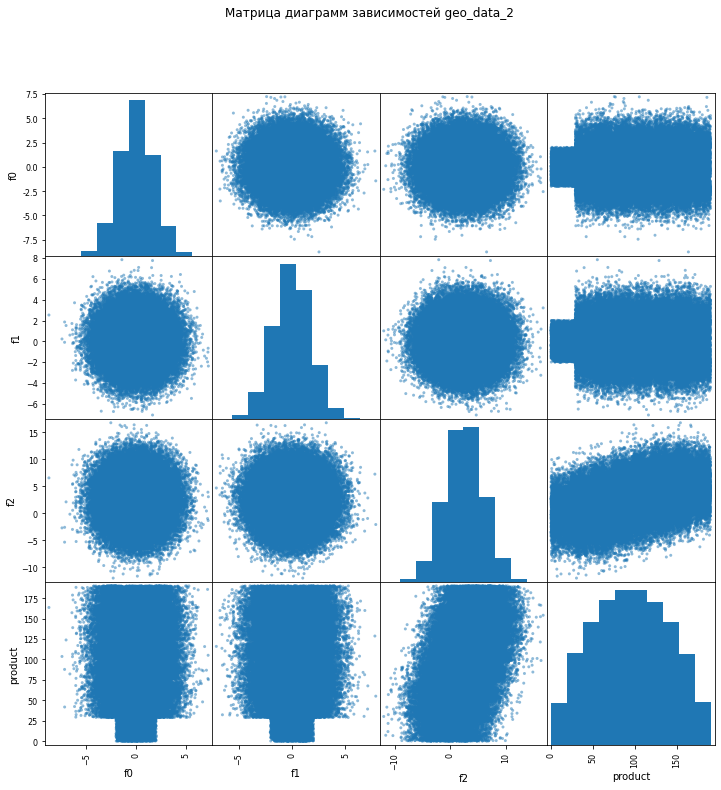

In [1084]:
# оценим на мультиколлинеарность факторов
# две переменные коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7
# Корреляция Пирсона измеряет лишь линейные связи:

pd.plotting.scatter_matrix(geo_data_0,figsize=(12, 12))
plt.suptitle("Матрица диаграмм зависимостей geo_data_0", size=12)
plt.show()

pd.plotting.scatter_matrix(geo_data_1,figsize=(12, 12))
plt.suptitle("Матрица диаграмм зависимостей geo_data_1", size=12)
plt.show()

pd.plotting.scatter_matrix(geo_data_2,figsize=(12, 12))
plt.suptitle("Матрица диаграмм зависимостей geo_data_2", size=12)
plt.show()

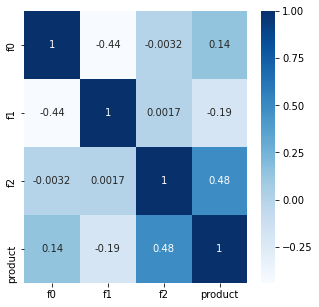

In [1085]:
# Посмортрим коэффициенты корреляции нулевого фрейма:

corr_0 = geo_data_0.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_0, 
            xticklabels=corr_0,
            yticklabels=corr_0,
           cmap="Blues", annot=True);

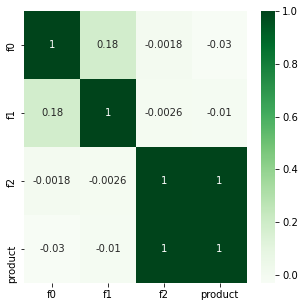

In [1086]:
# Посмортрим коэффициенты корреляции первого фрейма:

corr_1 = geo_data_1.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_1, 
            xticklabels=corr_1,
            yticklabels=corr_1,
           cmap="Greens", annot=True);

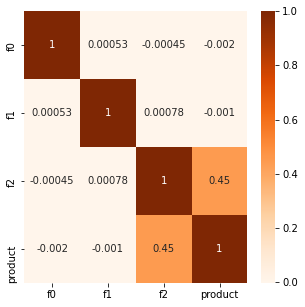

In [1087]:
# Посмортрим коэффициенты корреляции второго фрейма:

corr_2 = geo_data_2.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_2, 
            xticklabels=corr_2,
            yticklabels=corr_2,
           cmap="Oranges", annot=True);

Изучу гистограммы по столбцу `product`:

In [1088]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

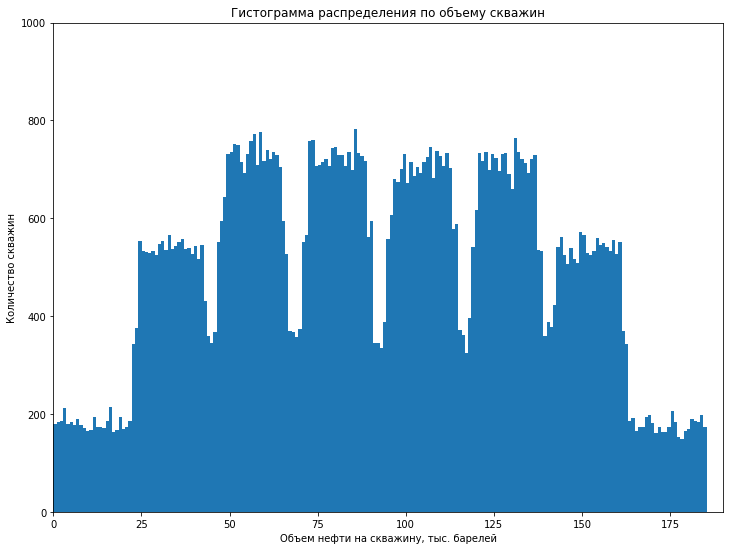

In [1089]:
oil_hist(geo_data_0['product'], 200, 190, 1000)

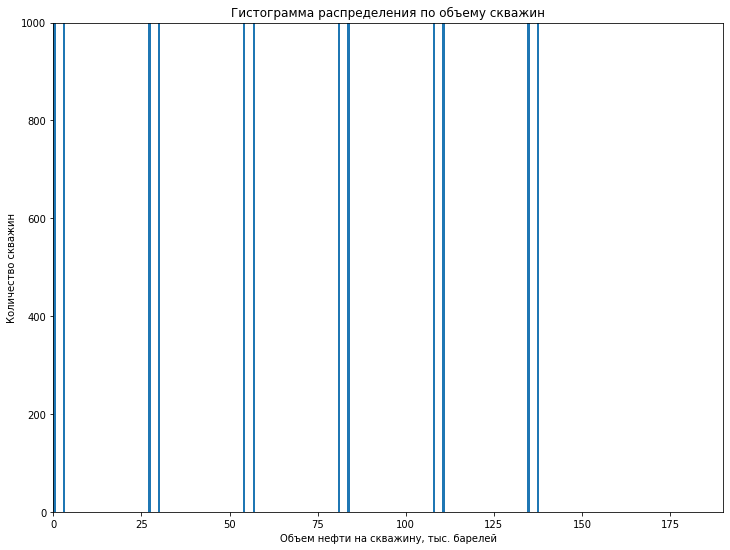

In [1090]:
oil_hist(geo_data_1['product'], 200, 190, 1000)

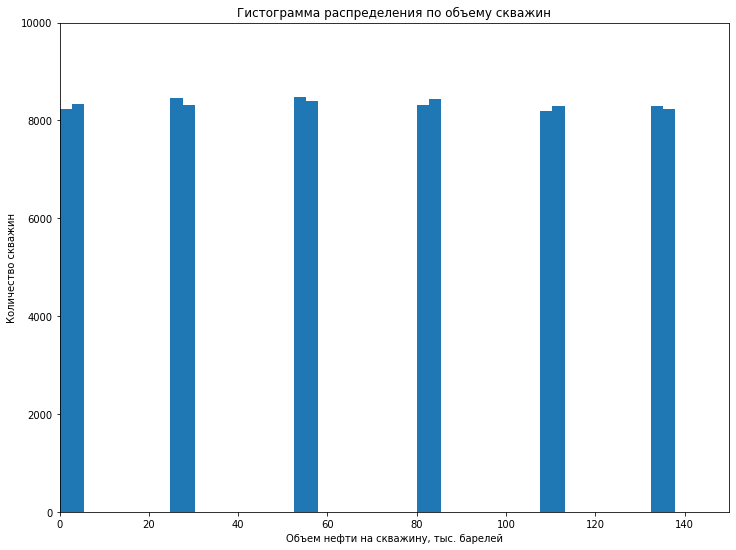

In [1091]:
oil_hist(geo_data_1['product'], 50, 150, 10000)

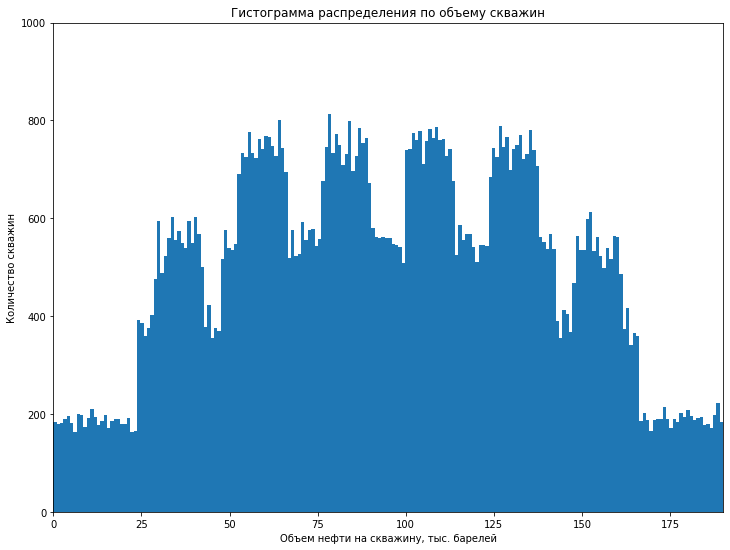

In [1092]:
oil_hist(geo_data_2['product'], 200, 190, 1000)

### Вывод по загрузке данных:

- В данных отсутсвуют пропуски и дубликаты. Потребуется удалить из каждого датафрейма столбец id. Он не несет значимости для для модели.

- Замечу, что в нулевом фрейме признаки f0 и f1 отрицательно коррелируют относительно друг друга и f2 слабо положительно коррелирует с целевым признаком. Так же в первом фрейме очень сильно коррелирует целевой признак и f2. Во втором фрейме так же есть коррелирующие признаки, такие как f2 и product.

- Если в случае с первым фреймом все достаточно понятно, там очень высокая корреляция и признак f2 можно бы удалить, то вот в случае с другими двумя выборками стоит опираться на результат, который мы получим на моделях. В канале ds_34_projects_2 в slack преподаватель попросил ничего не удалять из таблиц. Что все эти корреляции так и задуманы.

- По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

- Кроме того, данные не нужно масштабировать, т.к. разница в масштабах признаков 3-5 раз, в таком случае особого смысла от масштабирования нет.

Удалю столбцы `id`:

In [1093]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

## 2 шаг: Обучение и проверка модели

In [1094]:
def separation_df(df):
    """Функция выделяет целевой признак и признаки"""
    features = df.drop(['product'], axis=1)
    target = df['product']
    
    return features,target

In [1095]:
features_0,target_0 = separation_df(geo_0)
features_1,target_1 = separation_df(geo_1)
features_2,target_2 = separation_df(geo_2)

### Разделим у каждого датафрейма имеющиеся данные на две выборки: обучающую и тестовую в соотношении 75% : 25%, соответственно:

In [1096]:
def test_split(df, target):
    """Функция разделяет данные на обучающую и тестовую выборки (75% : 25%)"""
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_test, target_train, target_test

In [1097]:
features_train_0, features_test_0, target_train_0, target_test_0 = test_split(geo_data_0, 'product')

In [1098]:
features_train_1, features_test_1, target_train_1, target_test_1 = test_split(geo_data_1, 'product')

In [1099]:
features_train_2, features_test_2, target_train_2, target_test_2 = test_split(geo_data_2, 'product')

Проверим соотношения выборок у каждого датафрейма:

In [1100]:
# Проверим размеры выборок:

print('Размер тренериующей выборки geo_data_0:', features_train_0.shape[0])
print('Размер тестовой выборки geo_data_0:', features_test_0.shape[0])
print('Размер тренериующей выборки geo_data_1:', features_train_1.shape[0])
print('Размер тестовой выборки geo_data_1:', features_test_1.shape[0])
print('Размер тренериующей выборки geo_data_2:', features_train_2.shape[0])
print('Размер тестовой выборки geo_data_2:', features_test_2.shape[0])

Размер тренериующей выборки geo_data_0: 75000
Размер тестовой выборки geo_data_0: 25000
Размер тренериующей выборки geo_data_1: 75000
Размер тестовой выборки geo_data_1: 25000
Размер тренериующей выборки geo_data_2: 75000
Размер тестовой выборки geo_data_2: 25000


Сразу напишем функцию для наших метрик, по которым мы будем ориентироваться:

In [1101]:
def print_metrics(y_test,y_pred):
    """Функция вычислят и выводит необходимые метрики"""
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Средний предсказанный запас сырья:', y_pred.mean())
    pass

### Обучу модели и сделаю предсказания на валидационной выборке для каждого региона.

Сохраню предсказания и правильные ответы на Тестовой выборке.
Напечатаю на экране средний запас предсказанного сырья и RMSE модели для каждого региона.

In [1102]:
model = LinearRegression()

model.fit(features_train_0, target_train_0)
predicted_test_0 = model.predict(features_test_0)
print_metrics(target_test_0, predicted_test_0)

RMSE: 37.5794217150813
Средний предсказанный запас сырья: 92.59256778438035


In [1103]:
model.fit(features_train_1, target_train_1)
predicted_test_1 = model.predict(features_test_1)
print_metrics(target_test_1, predicted_test_1)

RMSE: 0.8930992867756165
Средний предсказанный запас сырья: 68.72854689544602


In [1104]:
model.fit(features_train_2, target_train_2)
predicted_test_2 = model.predict(features_test_2)
print_metrics(target_test_2, predicted_test_2)

RMSE: 40.02970873393434
Средний предсказанный запас сырья: 94.96504596800489


### Вывод по обучению и проверке модели:


***Нулевой регион:***
Ошибка в нулевом регионе самая маленькая, но по среднему объему запасов регион на втором месте.

***Первый регион:***
Проигрывает другим регионам и по показателю средней ошибки и по среднему объему запасов.

***Второй регион:***
Самый большой средний объем запасов, но по ошибке регион на втором месте.

## 3шаг: Подготовка к расчёту прибыли

***Подготовлюсь к расчёту прибыли:***

3.1. Все ключевые значения для расчётов сохраню в отдельных переменных.

3.2. Рассчитаю достаточный объём сырья для безубыточной разработки новой скважины. Сравню полученный объём сырья со средним запасом в каждом регионе.

3.3. Напишу выводы по этапу подготовки расчёта прибыли.

**По условию:**
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Запишем константные переменные, которые даны нам по условию:

In [1105]:
# BUDGET_OF_REGION - бюджет на разработку скважин в каждом регионе — 10 млрд рублей
BUDGET_OF_REGION = 10000000000

# WELLS_REGION - количество скважин (точек), иследуемых при разведке региона
WELLS_REGION = 500

# BEST_WELLS - количество отобранных скважин с наибольшими объемами сырья (лучших для разработки)
BEST_WELLS = 200

# BUDGET_ON_BEST_ONE - бюджет на разработку одной из отобранных скважин
BUDGET_ON_BEST_ONE = BUDGET_OF_REGION / BEST_WELLS

# REVENUE_PER_BAR - доход с каждой единицы продукта
REVENUE_PER_BAR = 450000

# RISK_FACTOR - допустимая вероятность убытков
RISK_FACTOR = 0.025

### Вычислю объем сырья для безубыточной разработки новой скважины:

ROI (от англ. return on investments, «возврат на инвестиции»). 

`ROI скважины` = (`Доход от скважины` - `Инвестиции`) / `Инвестиции`. 

Если ROI равен 0, то вложения окупились, но прибыли нет, а значит это и есть **точка безубыточности**.


- В таком случае `Инвестиции` = `Доход от скважины`.  

- `Доход от скважины` = `Объем сырья` * `Прибыль от продажи единицы сырья` (в тыс. баррель).

- Значит `Объем сырья` = `Инвестиции` / `Прибыль от продажи единицы сырья`.


- Инвестиции на разработку одной из 200 лучших скважин - `BUDGET_ON_BEST_ONE`.  

- Прибыль от продажи единицы сырья - `REVENUE_PER_BAR`.

In [1106]:
VOLUME_OF_RAW = BUDGET_ON_BEST_ONE / REVENUE_PER_BAR
print('Достаточный объём сырья для безубыточной разработки новой скважины:', int(VOLUME_OF_RAW), 'тысяч баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111 тысяч баррелей


### Сравнение со средним запасом в каждом регионе:

In [1107]:
print('Средний запас предсказанного сырья в Нулевом регионе:', int(predicted_test_0.mean()), 'тысяч баррелей')
print('Средний запас предсказанного сырья во Первом регионе:', int(predicted_test_1.mean()), 'тысяч баррелей')
print('Средний запас предсказанного сырья в Втором регионе:', int(predicted_test_2.mean()), 'тысяч баррелей')

Средний запас предсказанного сырья в Нулевом регионе: 92 тысяч баррелей
Средний запас предсказанного сырья во Первом регионе: 68 тысяч баррелей
Средний запас предсказанного сырья в Втором регионе: 94 тысяч баррелей


In [1108]:
def breakeven_wells(df):
    """Функция подсчета процента безубыточных скважин в регионе"""
    count = 0 
    for value in df['product']:
        if value > VOLUME_OF_RAW:
            count += 1 
    breakeven_percent = (count / len(df['product'])) * 100
    print('Процент перспективных скважин в регионе:', breakeven_percent)
    
    return breakeven_percent

In [1109]:
breakeven_percent_0 = breakeven_wells(geo_0)
breakeven_percent_1 = breakeven_wells(geo_1)
breakeven_percent_2 = breakeven_wells(geo_2)

Процент перспективных скважин в регионе: 36.583
Процент перспективных скважин в регионе: 16.537
Процент перспективных скважин в регионе: 38.178


### Вывод:

Достаточный объём сырья для безубыточной разработки новой скважины равен 111 тыс. баррелей, что **превышает** средние показатели сырья в каждом из регионов (92 тыс., 68 тыс., 94 тыс., соответственно), но при этом, во всех трех регионах имеются перспективные месторождения, которые смогли бы преодолеть *точку безубыточности*.

## 4 шаг: Расчёт прибыли и рисков 

***Напишу функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:***

4.1. Выберу скважины с максимальными значениями предсказаний.

4.2. Просуммирую целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитаю прибыль для полученного объёма сырья.

***Посчитаю риски и прибыль для каждого региона:***

5.1. Применю технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найду среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишу выводы: предложу регион для разработки скважин и обосную выбор.

### Функция расчета прибыли по выбранным скважинам и предсказаниям модели:

In [1110]:
probabilities_test_0 = pd.Series(predicted_test_0, index = target_test_0.index)
probabilities_test_1 = pd.Series(predicted_test_1, index = target_test_1.index)
probabilities_test_2 = pd.Series(predicted_test_2, index = target_test_2.index)

In [1111]:
def profit(target, predictions):
    """Функция расчета прибыли по 200 скважинам с самыми большими объемами сырья, 
    полученными по предсказаниям модели.
    
    1) Объединили предсказания и целевой тестовый признак в один df с общими индексами
    2) Отсортировали 200 скважин (BEST_WELLS) с самыми большими объемами сырья (по предсказаниям)
    3) Выбрали соответствующие по индексам скважины в целевом признаке
    4) Высчитали общую прибыль для полученного объема сырья"""
    
    quantity_over = 0
    data_test = pd.concat([predictions, target],axis=1)
    data_test.columns = ['predictions','target']
    
    reg_wells = data_test.sort_values(by = 'predictions', ascending=False).head(BEST_WELLS)
    selected_wells = target[reg_wells.index][:BEST_WELLS]
    for wells in selected_wells:
        quantity_over += (wells - VOLUME_OF_RAW) * REVENUE_PER_BAR
    return quantity_over

### Функция расчета прибыли и рисков методом Bootstrap для каждого региона:

In [1112]:
def profit_and_risks(target, probabilities):
    
    """Функция расчета прибыли и рисков методом Bootstrap.
    1) Создали 1000 рандомных выборок по 500 скважин (исследуемых при разведки региона - WELLS_REGION)
    2) Выбрали для каждой из выборок 200 лучших скважин, применив функцию profit, описанную выше
    3) Нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков"""
    
    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = WELLS_REGION, replace=True, random_state=state) 
        probs_subsample = probabilities[target_subsample.index]
    
        prof = profit(target_subsample, probs_subsample)
        values.append(prof)

        
    values = pd.Series(values)
    
    lower = values.quantile(0.025) / 10e6
    upper = values.quantile(0.975) / 10e6
    mean = values.mean() / 10e6
    
    risks = (values < 0).mean()
    
    print('Средняя выручка в регионе:', mean, 'млн. руб.')
    print('95% доверительный интервал в регионе от', float(lower), 'до', float(upper), 'млн. руб.')
    print('Вероятность убытков в регионе:', risks * 100, '%')
    
    return mean,lower,upper,risks

**Найду прибыть и риски для кадого региона:**

Для нулевого региона:

In [1113]:
zero_reg_profit = profit_and_risks(target_test_0, probabilities_test_0)

Средняя выручка в регионе: 42.593852691059176 млн. руб.
95% доверительный интервал в регионе от -10.209009483793764 до 94.7976353358368 млн. руб.
Вероятность убытков в регионе: 6.0 %


Для первого региона:

In [1114]:
first_reg_profit = profit_and_risks(target_test_1, probabilities_test_1)

Средняя выручка в регионе: 51.52227734432943 млн. руб.
95% доверительный интервал в регионе от 6.887322537050717 до 93.15475912570476 млн. руб.
Вероятность убытков в регионе: 1.0 %


Для второго региона:

In [1115]:
second_reg_profit = profit_and_risks(target_test_2, probabilities_test_2)

Средняя выручка в регионе: 43.500836278275564 млн. руб.
95% доверительный интервал в регионе от -12.888054732978945 до 96.9706954180266 млн. руб.
Вероятность убытков в регионе: 6.4 %


### Общий вывод по проекту:

- Из всех трех регионов *наименьшая* вероятность убытков у `Первого региона`(1%), что ниже заданного порога риска в 2,5%.

- Наибольшую среднюю выручку принесет добыча так же в `Первом регионе` (51,52 млн. руб. с каждой из перспективных скважин).

***Вывод***: Для реализации проекта лучше обратить внимание на `Первый регион`, так как разработка новых скважин в данном регионе сопряжена с *наименьшими* рисками и *наибольшей* выручкой.